In [1]:
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import IPython.display as ipd
import scipy
import tensorflow as tf


from sklearn.metrics import accuracy_score
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\user\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
from scipy.io import wavfile
from playsound import playsound
sample_sound, sample_rate = librosa.load("C:/Users/user/Desktop/archive/TRAIN/1.wav")
sample_audio = ipd.Audio(sample_sound, rate=sample_rate)
sample_audio

In [3]:
import pandas as pd
import numpy as np
train= pd.read_csv('audio_sent.csv')
train.head()

,Filename,Class
0,346.wav,Negative
1,163.wav,Neutral
2,288.wav,Negative
3,279.wav,Negative
4,244.wav,Negative


In [4]:
train_path = []
train_classes = []

for path_number in range(len(train)):
    File_Path_Name = "C:/Users/user/Desktop/archive/TRAIN/" + str(train["Filename"][path_number])
    train_path.append(File_Path_Name)
    train_classes.append(train["Class"][path_number])
train_path

['C:/Users/user/Desktop/archive/TRAIN/346.wav',
 'C:/Users/user/Desktop/archive/TRAIN/163.wav',
 'C:/Users/user/Desktop/archive/TRAIN/288.wav',
 'C:/Users/user/Desktop/archive/TRAIN/279.wav',
 'C:/Users/user/Desktop/archive/TRAIN/244.wav',
 'C:/Users/user/Desktop/archive/TRAIN/273.wav',
 'C:/Users/user/Desktop/archive/TRAIN/5.wav',
 'C:/Users/user/Desktop/archive/TRAIN/353.wav',
 'C:/Users/user/Desktop/archive/TRAIN/145.wav',
 'C:/Users/user/Desktop/archive/TRAIN/109.wav',
 'C:/Users/user/Desktop/archive/TRAIN/211.wav',
 'C:/Users/user/Desktop/archive/TRAIN/38.wav',
 'C:/Users/user/Desktop/archive/TRAIN/214.wav',
 'C:/Users/user/Desktop/archive/TRAIN/55.wav',
 'C:/Users/user/Desktop/archive/TRAIN/305.wav',
 'C:/Users/user/Desktop/archive/TRAIN/58.wav',
 'C:/Users/user/Desktop/archive/TRAIN/241.wav',
 'C:/Users/user/Desktop/archive/TRAIN/47.wav',
 'C:/Users/user/Desktop/archive/TRAIN/166.wav',
 'C:/Users/user/Desktop/archive/TRAIN/140.wav',
 'C:/Users/user/Desktop/archive/TRAIN/342.wav'

In [6]:
train_df.head()

,Filename,Class
0,C:/Users/user/Desktop/archive/TRAIN/346.wav,Negative
1,C:/Users/user/Desktop/archive/TRAIN/163.wav,Neutral
2,C:/Users/user/Desktop/archive/TRAIN/288.wav,Negative
3,C:/Users/user/Desktop/archive/TRAIN/279.wav,Negative
4,C:/Users/user/Desktop/archive/TRAIN/244.wav,Negative


In [7]:
train_df.sample(frac=1).reset_index(drop=True)

,Filename,Class
0,C:/Users/user/Desktop/archive/TRAIN/39.wav,Positive
1,C:/Users/user/Desktop/archive/TRAIN/1.wav,Positive
2,C:/Users/user/Desktop/archive/TRAIN/55.wav,Positive
3,C:/Users/user/Desktop/archive/TRAIN/241.wav,Negative
4,C:/Users/user/Desktop/archive/TRAIN/96.wav,Positive
...,...,...
245,C:/Users/user/Desktop/archive/TRAIN/334.wav,Negative
246,C:/Users/user/Desktop/archive/TRAIN/147.wav,Neutral
247,C:/Users/user/Desktop/archive/TRAIN/275.wav,Negative
248,C:/Users/user/Desktop/archive/TRAIN/316.wav,Negative


In [8]:
train_df["Class"].value_counts()

Negative    87
Positive    82
Neutral     81
Name: Class, dtype: int64

In [9]:
random_normal=np.random.randint(0,len(train_df))
sound_address = train_df.iloc[random_normal]["Filename"]
print(train_df.iloc[random_normal]["Class"])

Neutral


In [10]:
sample_sound, sample_rate = librosa.load(sound_address)
sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

sample_audio

In [11]:
def playing_function(sound_address):
    sound_address= sound_address+str('.wav')
    sample_sound, sample_rate = librosa.load(sound_address)
    sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

    return sample_audio

In [12]:
def waveplot_function(sound_address):
    figure = plt.figure(figsize=(14,6))
    
    sample_sound, sample_rate = librosa.load(sound_address)    
    librosa.display.waveshow(sample_sound,sr=sample_rate)

In [13]:
def spectrum(sound_address):
    sample_sound, sample_rate = librosa.load(sound_address) 
    fft = np.fft.fft(sample_sound)
    magnitude = np.abs(fft)
    freq = np.linspace(0,sample_rate, len(magnitude)) 
    half_freq = freq[:int(len(freq)/2)]
    half_magnitude = magnitude[:int(len(freq)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

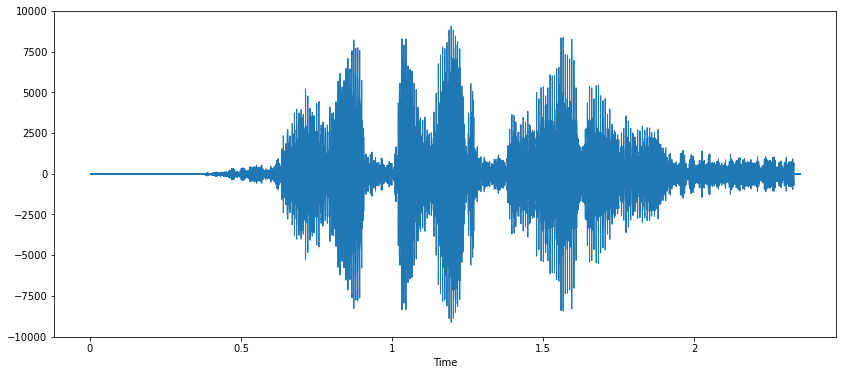

In [14]:
import matplotlib.pyplot as plt
waveplot_function(sound_address)

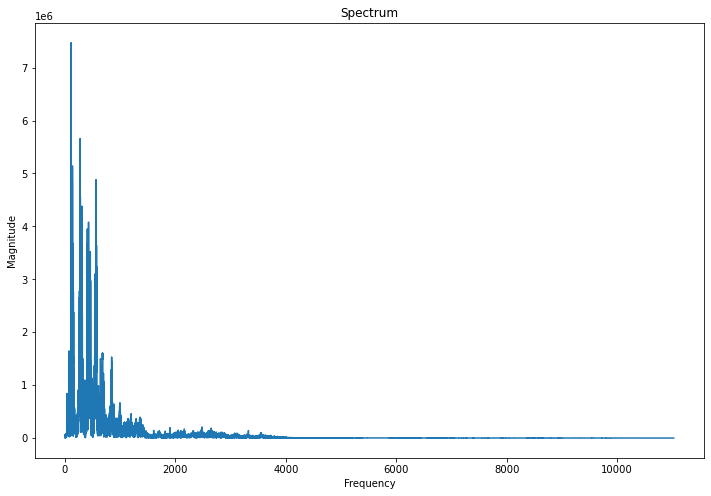

In [15]:
spectrum(sound_address)

In [16]:
def spectrogram(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft = librosa.stft(sample_sound, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(15,10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.title("Spectrogram")

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


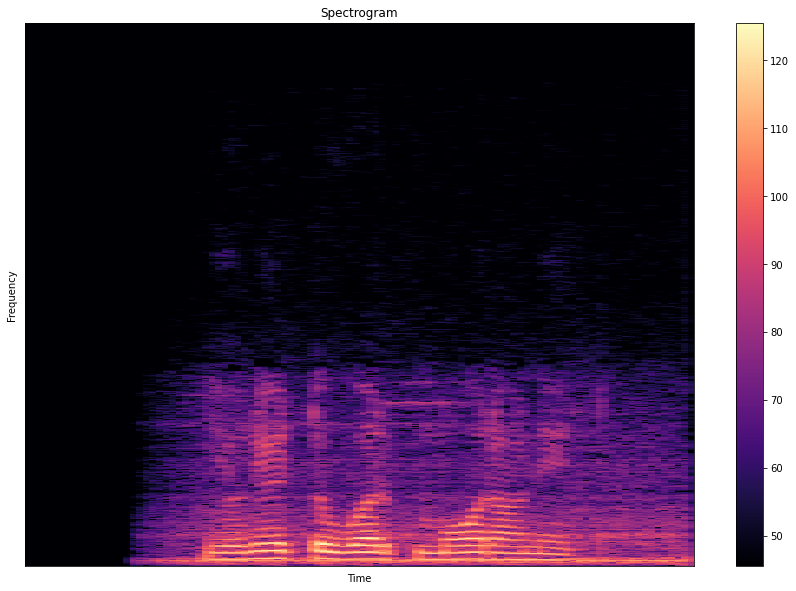

In [17]:
spectrogram(sound_address)

In [18]:
def MFCCS(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    # MFCCs
    # extract 39 MFCCs
    MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=39)

    # display MFCCs
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")

    # show plots
    plt.show()

In [19]:
def MFCCS_features(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    # MFCCs
    # extract 39 MFCCs
    MFCCs = np.mean(librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=39).T, axis=0)
    return MFCCs

In [20]:
MFCCS_features(sound_address)

array([ 6.1607916e+02,  1.5714871e+02, -1.0379180e+01,  2.4310841e+01,
        8.2498245e+00, -1.8502321e+01,  8.3122883e+00,  4.2141781e+00,
       -7.8294559e+00,  2.6444972e+00, -1.4661700e-01,  2.2613113e-01,
        6.3021474e+00, -1.6109474e+00, -1.7166437e+00,  1.9801912e+00,
       -6.1821443e-01, -5.8779693e-01, -4.4178371e+00, -4.3943276e+00,
        6.9183648e-01,  1.5886757e+00, -3.7093761e+00, -1.5669472e+00,
       -4.1457060e-01, -5.5990677e+00, -3.5242670e+00, -5.9749894e+00,
       -7.2041078e+00, -3.9648046e+00, -2.6631742e+00, -1.6860327e+00,
       -3.2664888e+00, -5.4820046e+00, -3.7359102e+00, -2.4931109e+00,
       -5.1305313e+00, -7.4499846e+00, -7.5425658e+00], dtype=float32)

In [21]:
MFCCS_features(sound_address).shape

(39,)

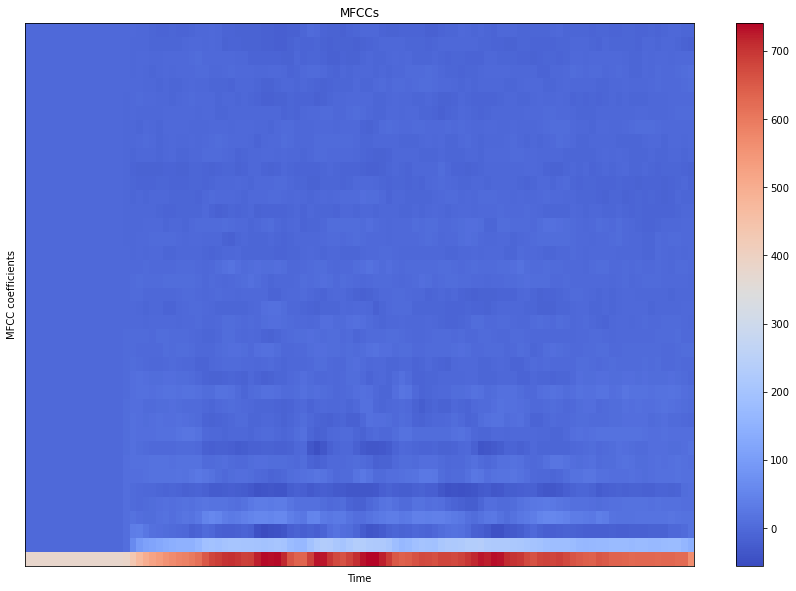

In [22]:
MFCCS(sound_address)

In [23]:
Data= np.zeros((len(train_df),39))
for i in range(len(train_df)):
    Data[i,:]= MFCCS_features(train_df['Filename'][i])
Data= pd.DataFrame(Data)
Data['label']= train_df['Class']
Data= Data.replace({'Negative': -1, 'Neutral': 0, 'Positive':1})

Data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,label
0,-557.515015,97.462776,13.633415,28.992313,-3.867813,-11.120905,0.003877,2.915550,-3.715423,-0.356188,...,-1.297927,-2.319828,-2.177892,-3.576218,-4.421993,-4.441558,-4.847635,-1.681758,-1.035009,-1
1,-305.413788,130.537201,-29.257811,35.780434,18.202265,-16.830034,-16.660868,6.571378,-2.237308,-21.271738,...,-7.832156,0.079097,-4.383029,-5.653067,-2.478641,-4.935899,-5.191062,-1.131171,-2.030416,0
2,-559.859253,89.642151,14.090804,29.319788,-11.514137,-2.917554,1.597941,1.816893,-7.231166,3.095866,...,-1.843541,-3.064543,-3.787802,-4.135148,-4.545709,-4.504701,-5.136135,-2.065035,-2.135934,-1
3,-519.883972,109.406967,0.871161,31.943243,-5.227342,-5.809072,-5.708396,0.755445,-5.781681,3.396683,...,-2.076976,-1.131739,-2.854620,-5.698560,-4.493452,-4.866540,-5.998975,-2.897494,-4.088596,-1
4,-533.089478,115.384666,20.029568,23.852758,-18.697493,-4.313009,4.697014,4.302791,-7.302723,1.939893,...,-1.046779,-0.222558,-1.887183,-5.807579,-6.394127,-4.253747,-6.882200,-5.786300,-3.723921,-1


In [24]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(Data, test_size=0.2, random_state=25)
train_data= training_data.drop('label', axis= 1)
train_label= training_data.label
test_data= testing_data.drop('label', axis=1)
test_label= testing_data.label

In [25]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
247,-548.437561,96.251274,9.719665,21.169584,2.483581,-6.785193,-0.167024,7.475581,-6.311178,2.064018,...,-0.546290,-0.369770,-0.328604,-4.483194,-4.207814,-3.592427,-5.661891,-4.542853,-2.413698,-1.619990
91,-551.313843,109.363274,18.252365,23.596893,2.689028,-3.587400,-4.283360,-0.745730,-5.329816,5.482625,...,0.125251,-0.462934,-0.756308,-2.295645,-4.155646,-5.456753,-3.335841,-4.162524,-3.232278,-1.942530
93,666.070312,130.153564,-3.008115,39.587528,3.352901,-14.487512,-15.019163,0.570142,-1.487098,-13.379096,...,1.228544,-5.797877,-3.025359,-3.040542,-2.434866,-3.140728,-4.576645,-4.821756,-3.879673,-1.711516
135,-322.379395,124.200134,-11.588849,34.562607,10.947148,-12.641938,-16.243578,5.650137,0.379819,-18.953707,...,-2.312944,-1.494691,-5.028715,-1.072480,-3.858365,-2.743680,-4.153840,-5.039112,-4.771982,-3.823583
32,-319.065796,103.059395,-12.837102,50.332417,10.856051,-7.322279,-19.337643,8.640272,-10.022252,-8.701282,...,0.370377,-4.568698,-3.615165,-1.083893,-5.079729,-2.410593,-2.165402,-5.497966,-1.301834,-4.221025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,495.712799,110.229019,14.329425,26.482826,-2.097601,1.024760,-9.533755,2.255376,-2.337153,5.494254,...,-6.156715,-0.672417,2.099769,-4.299727,-3.273656,-5.060579,-5.446556,-5.184358,-4.912644,-3.979075
143,-333.712189,124.952271,-36.580994,56.290688,20.808104,-16.511883,-13.439331,-2.914145,-7.375266,-1.760220,...,-1.923779,-3.166247,-4.891697,-1.121523,-4.874091,-3.914810,-0.729445,-6.432517,-2.818483,-1.439498
218,623.901184,130.043228,-15.966110,41.053379,11.148787,-17.957235,-4.226216,-2.789661,-4.289037,-5.734615,...,-1.216386,-3.351687,-3.971254,-1.976874,-3.657747,-5.291006,-1.424268,-5.245621,-5.977444,-1.188419
62,-542.131348,81.268333,12.193093,28.837860,-2.122270,2.790455,-5.079256,2.067394,1.317951,1.636533,...,-4.150546,0.072310,1.593096,-2.743245,-1.403731,-2.591731,-3.068857,-4.252875,-2.934260,0.567199


In [45]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)
predict= clf.predict(test_data)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, predict)

0.66

In [28]:
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(train_data, train_label)
predict1= clf1.predict(test_data)
accuracy_score(test_label, predict1)

0.66

In [29]:
clf2 = svm.LinearSVC()
clf2.fit(train_data, train_label)
predict2= clf2.predict(test_data)
accuracy_score(test_label, predict2)

0.94

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_data, train_label).predict(test_data)
accuracy_score(test_label, y_pred)

0.86

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree_pred= tree.fit(train_data,train_label).predict(test_data)
accuracy_score(test_label, tree_pred)

0.92

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data,train_label)

#Predict Output
predicted_knn= model.predict(test_data) # 0:Overcast, 2:Mild
accuracy_score(test_label, predicted_knn)

0.88

In [51]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_log.fit(train_data,train_label)

#Predict Output
predicted_log= model_log.predict(test_data) # 0:Overcast, 2:Mild
accuracy_score(test_label, predicted_log)

0.94

# 13 MFCC

In [34]:
def MFCCS_features_13(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    # MFCCs
    # extract 39 MFCCs
    MFCCs = np.mean(librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13).T, axis=0)
    return MFCCs

Data_13= np.zeros((len(train_df),13))
for i in range(len(train_df)):
    Data_13[i,:]= MFCCS_features_13(train_df['Filename'][i])
Data_13= pd.DataFrame(Data_13)
Data_13['label']= train_df['Class']
Data_13= Data_13.replace({'Negative': -1, 'Neutral': 0, 'Positive':1})

training_data13, testing_data13 = train_test_split(Data_13, test_size=0.2, random_state=25)
train_data13= training_data13.drop('label', axis= 1)
train_label13= training_data13.label
test_data13= testing_data13.drop('label', axis=1)
test_label13= testing_data13.label

In [35]:
clf = svm.SVC()
clf.fit(train_data13, train_label13)
predict13= clf.predict(test_data13)
accuracy_score(test_label13, predict13)

0.66

In [36]:
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(train_data13, train_label13)
predict1= clf1.predict(test_data13)
accuracy_score(test_label13, predict1)

0.66

In [37]:
clf2 = svm.LinearSVC()
clf2.fit(train_data13, train_label13)
predict2= clf2.predict(test_data13)
accuracy_score(test_label13, predict2)

0.92

In [38]:
gnb = GaussianNB()
y_pred = gnb.fit(train_data13, train_label13).predict(test_data13)
accuracy_score(test_label13, y_pred)

0.88

In [39]:
tree = DecisionTreeClassifier(random_state=0)
tree_pred= tree.fit(train_data13,train_label13).predict(test_data13)
accuracy_score(test_label13, tree_pred)

0.92

In [40]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data13,train_label13)

#Predict Output
predicted_knn= model.predict(test_data13) # 0:Overcast, 2:Mild
accuracy_score(test_label13, predicted_knn)

0.9

In [41]:
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_log.fit(train_data13,train_label13)

#Predict Output
predicted_log= model_log.predict(test_data13) # 0:Overcast, 2:Mild
accuracy_score(test_label13, predicted_log)

0.9

# Trying test audio

In [5]:
path= "C:/Users/user/Desktop/archive/TEST/4.wav"
sample_sound, sample_rate = librosa.load(path)
sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

sample_audio

In [43]:
features= np.zeros((1,39))
features= MFCCS_features(path)
features= pd.DataFrame(features)
features.shape

(39, 1)

In [47]:
clf.predict(features.T)

array([-1], dtype=int64)

In [52]:
gnb.fit(train_data, train_label).predict(features.T)

array([1], dtype=int64)

In [53]:
tree.fit(train_data,train_label).predict(features.T)

array([1], dtype=int64)

In [54]:
model.predict(features.T)

array([1], dtype=int64)

In [55]:
model_log.predict(features.T)

array([1], dtype=int64)

# Emotions analysis

In [ ]:
C:\Users\user\Desktop\emovo\EMOVO\Audio

In [65]:
import os
# Get the list of all files and directories
path = "C:/Users/user/Desktop/emovo/EMOVO/Audio/"
dir_list = os.listdir(path) 
print(dir_list)

['dis-f1-b1.wav', 'dis-f1-b2.wav', 'dis-f1-b3.wav', 'dis-f1-d1.wav', 'dis-f1-d2.wav', 'dis-f1-l1.wav', 'dis-f1-l2.wav', 'dis-f1-l3.wav', 'dis-f1-l4.wav', 'dis-f1-n1.wav', 'dis-f1-n2.wav', 'dis-f1-n3.wav', 'dis-f1-n4.wav', 'dis-f1-n5.wav', 'dis-f2-b1.wav', 'dis-f2-b2.wav', 'dis-f2-b3.wav', 'dis-f2-d1.wav', 'dis-f2-d2.wav', 'dis-f2-l1.wav', 'dis-f2-l2.wav', 'dis-f2-l3.wav', 'dis-f2-l4.wav', 'dis-f2-n1.wav', 'dis-f2-n2.wav', 'dis-f2-n3.wav', 'dis-f2-n4.wav', 'dis-f2-n5.wav', 'dis-f3-b1.wav', 'dis-f3-b2.wav', 'dis-f3-b3.wav', 'dis-f3-d1.wav', 'dis-f3-d2.wav', 'dis-f3-l1.wav', 'dis-f3-l2.wav', 'dis-f3-l3.wav', 'dis-f3-l4.wav', 'dis-f3-n1.wav', 'dis-f3-n2.wav', 'dis-f3-n3.wav', 'dis-f3-n4.wav', 'dis-f3-n5.wav', 'dis-m1-b1.wav', 'dis-m1-b2.wav', 'dis-m1-b3.wav', 'dis-m1-d1.wav', 'dis-m1-d2.wav', 'dis-m1-l1.wav', 'dis-m1-l2.wav', 'dis-m1-l3.wav', 'dis-m1-l4.wav', 'dis-m1-n1.wav', 'dis-m1-n2.wav', 'dis-m1-n3.wav', 'dis-m1-n4.wav', 'dis-m1-n5.wav', 'dis-m2-b1.wav', 'dis-m2-b2.wav', 'dis-m2-b3.wa

In [66]:
dir_list[10]

'dis-f1-n2.wav'

In [67]:
Data= np.zeros((len(dir_list),39))
for i in range(len(dir_list)):
        Data[i,:]= MFCCS_features(path+dir_list[i])

Data= pd.DataFrame(Data)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-408.541534,45.775871,-1.750611,10.929870,6.987317,-1.106099,-2.762381,3.516360,-1.078869,9.494739,...,4.014360,0.729165,4.989864,-0.565995,1.938920,-2.805806,3.128930,2.316707,1.530723,-1.507256
1,-407.840271,38.423416,8.000926,17.194372,-1.808096,-1.747686,0.133167,3.654684,-9.754920,10.250427,...,2.705518,1.051967,3.036444,-1.514960,2.121745,-2.927304,2.263202,-2.445462,1.940814,-1.112267
2,-395.586304,61.283161,-12.053917,6.867619,4.756406,-1.979265,-3.958380,2.057167,-7.953853,10.267926,...,7.721159,1.008886,6.789762,-2.372322,4.193210,-0.881221,1.870479,-4.688568,-1.205598,-3.952418
3,-397.745972,71.277672,-1.086335,3.435553,12.004572,8.043879,3.564284,-3.283970,-0.656898,11.770112,...,2.658467,-1.338825,3.688538,0.719138,2.405077,-0.252851,0.215223,-2.715822,2.601498,0.716217
4,-451.921936,71.296417,7.311301,15.754690,6.953606,7.946301,7.266053,1.414286,-4.043769,8.434618,...,6.329885,3.188490,2.602619,-2.214442,0.055822,-0.584951,2.361372,-0.861525,1.594655,-0.676305


In [68]:
Data.shape

(588, 39)

In [71]:
fullstring = dir_list[10]
substring = "dis"

if substring in fullstring:
    print("Found!")
else:
    print("Not found!")

Found!


In [89]:
emotion= np.zeros((len(Data),1))
for i in range(len(Data)):
    if "gio" in dir_list[i]:
        emotion[i]= 0
    elif "neu" in dir_list[i]:
         emotion[i]= 1
    elif "pau" in dir_list[i]:
         emotion[i]= 2
    elif "rab" in dir_list[i]:
         emotion[i]= 3
    elif "sor" in dir_list[i]:
         emotion[i]= 4
    elif "tri" in dir_list[i]:
         emotion[i]= 5
    elif "dis" in dir_list[i]:
         emotion[i]= 7
Data['emotions']= emotion  

Data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,emotions
0,-408.541534,45.775871,-1.750611,10.929870,6.987317,-1.106099,-2.762381,3.516360,-1.078869,9.494739,...,0.729165,4.989864,-0.565995,1.938920,-2.805806,3.128930,2.316707,1.530723,-1.507256,7.0
1,-407.840271,38.423416,8.000926,17.194372,-1.808096,-1.747686,0.133167,3.654684,-9.754920,10.250427,...,1.051967,3.036444,-1.514960,2.121745,-2.927304,2.263202,-2.445462,1.940814,-1.112267,7.0
2,-395.586304,61.283161,-12.053917,6.867619,4.756406,-1.979265,-3.958380,2.057167,-7.953853,10.267926,...,1.008886,6.789762,-2.372322,4.193210,-0.881221,1.870479,-4.688568,-1.205598,-3.952418,7.0
3,-397.745972,71.277672,-1.086335,3.435553,12.004572,8.043879,3.564284,-3.283970,-0.656898,11.770112,...,-1.338825,3.688538,0.719138,2.405077,-0.252851,0.215223,-2.715822,2.601498,0.716217,7.0
4,-451.921936,71.296417,7.311301,15.754690,6.953606,7.946301,7.266053,1.414286,-4.043769,8.434618,...,3.188490,2.602619,-2.214442,0.055822,-0.584951,2.361372,-0.861525,1.594655,-0.676305,7.0


In [90]:
Data.emotions.value_counts()

7.0    84
0.0    84
1.0    84
2.0    84
3.0    84
4.0    84
5.0    84
Name: emotions, dtype: int64

In [93]:
Data= Data.sample(frac = 1)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,emotions
95,-403.507050,62.240288,-8.245367,31.735855,0.259117,-18.898745,-10.466972,1.647800,-1.692001,-4.149382,...,-0.454388,4.151156,-1.324932,3.224126,-1.025805,2.219834,-0.563484,2.562014,0.731722,0.0
559,-538.060852,50.338276,12.596174,24.975458,9.475015,18.587826,3.219635,11.546426,-0.542216,9.435401,...,-4.604819,4.208499,-5.486839,2.293380,-4.665375,2.916408,-3.995708,2.201582,-3.863869,5.0
196,-392.936676,85.555962,-0.774264,33.556721,-1.679382,-25.656559,-10.678170,1.138808,-15.746174,5.137742,...,3.842684,7.970119,6.300352,8.722383,1.572887,3.504973,-3.222107,-0.778933,-0.018616,1.0
166,-393.394714,77.161781,-4.640378,40.025723,-0.777154,-6.802033,-1.310709,-0.782441,-17.166279,10.306121,...,-3.357652,-0.270100,-2.206469,0.945564,-4.901907,-0.409816,-5.197936,-0.952504,-5.354857,0.0
100,-309.733063,67.355576,-14.864038,23.213413,-14.321072,-15.623518,-8.939084,8.609456,-11.194891,-2.677579,...,0.305957,1.421071,-3.046590,-1.306862,-0.972533,-1.800941,-5.365963,-2.757117,-3.987447,0.0


In [101]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(Data, test_size=0.2, random_state=25)
train_data= training_data.drop('emotions', axis= 1)
train_label= training_data.emotions
test_data= testing_data.drop('emotions', axis=1)
test_label= testing_data.emotions
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
141,-387.440613,47.386005,17.965279,50.051014,11.162301,3.511354,-14.492146,20.062826,2.584352,-11.348576,...,5.475943,6.105359,7.985356,3.424937,4.049212,-0.361995,3.517560,-0.239530,0.875671,-1.775660
100,-309.733063,67.355576,-14.864038,23.213413,-14.321072,-15.623518,-8.939084,8.609456,-11.194891,-2.677579,...,2.669629,0.305957,1.421071,-3.046590,-1.306862,-0.972533,-1.800941,-5.365963,-2.757117,-3.987447
23,-343.003052,74.661682,-19.564697,19.576485,-2.075742,-10.888927,-20.219208,2.285540,-7.373301,-2.545616,...,3.660142,0.205872,1.573543,-1.613178,0.463126,-2.424453,-0.201660,-2.612226,-0.533031,-1.992824
415,-447.981812,91.996895,-4.345297,13.783512,-7.813619,1.144813,-2.120880,1.268659,-9.163471,-0.125607,...,-2.292975,-3.603514,2.072251,-4.912467,-0.660587,-4.971105,-0.944073,-3.015191,-1.189640,-3.221075
339,-354.560486,53.328476,-11.839351,15.000747,2.477352,-11.121059,-7.926763,8.225272,-2.002587,1.678429,...,5.090099,-1.457662,3.113151,-2.562127,5.526098,1.341822,4.076383,-0.947853,3.640069,-0.812309


In [102]:
train_data.shape, test_data.shape

((470, 39), (118, 39))

In [109]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(train_data, train_label)
predict= clf.predict(test_data)
accuracy_score(test_label, predict)

0.19491525423728814

In [161]:
clf2 = svm.LinearSVC()
clf2.fit(train_data, train_label)
predict2= clf2.predict(test_data)
accuracy_score(test_label, predict2)

0.5847457627118644

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_data, train_label).predict(test_data)
accuracy_score(test_label, y_pred)

0.4830508474576271

In [118]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree_pred= tree.fit(train_data,train_label).predict(test_data)
accuracy_score(test_label, tree_pred)

0.5084745762711864

In [157]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data,train_label)

#Predict Output
predicted_knn= model.predict(test_data) # 0:Overcast, 2:Mild
accuracy_score(test_label, predicted_knn)

0.7033898305084746

In [120]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_log.fit(train_data,train_label)

#Predict Output
predicted_log= model_log.predict(test_data) # 0:Overcast, 2:Mild
accuracy_score(test_label, predicted_log)

0.5932203389830508

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(max_depth=10, random_state=0)
rfor.fit(train_data,train_label)
pred_for= rfor.predict(test_data)
accuracy_score(test_label, pred_for)

0.7033898305084746

In [155]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(train_data,train_label)
pred_ada= ada.predict(test_data)
accuracy_score(test_label, pred_ada)

0.3050847457627119

In [162]:
path_rand= "C:/Users/user/Desktop/emovo/EMOVO/Audio/gio-m3-n3.wav"
sample_sound, sample_rate = librosa.load(path_rand)
sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

sample_audio